In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Intro to Machine Learning

One of the main ideas of machine learning, is to split data into testing and training sets.  These sets are used to develop the model, and subsequently test its accuracy.  Later, we will repeat this process a number of times to get an even better model.  Machine learning can be thought of as representing a philosophy to model building, where we improve our models by iteratively building the model and testing it's performance on held out data.

In [2]:
x = np.random.randn(400)
y = np.random.randn(400)

In [3]:
x.shape

(400,)

Text(0,1,'Idea of Test and Train Split \nin Machine Learning')

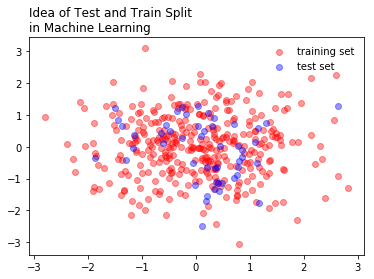

In [4]:
plt.scatter(x[:350], y[:350], color = 'red', alpha = 0.4, label = 'training set')
plt.scatter(x[350:], y[350:], color = 'blue', alpha = 0.4, label = 'test set')
plt.legend(loc = 'best', frameon = False)
plt.title("Idea of Test and Train Split \nin Machine Learning", loc = 'left')

In [5]:
X_train, x_test, y_train, y_test = x[:350].reshape(-1,1), x[350:].reshape(-1,1), y[:350].reshape(-1,1), y[350:].reshape(-1,1)

In [6]:
X_train.shape

(350, 1)

In [7]:
from sklearn import linear_model

In [8]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
reg.coef_

array([[-0.0010095]])

In [10]:
y_predict = reg.predict(x_test.reshape(-1,1))

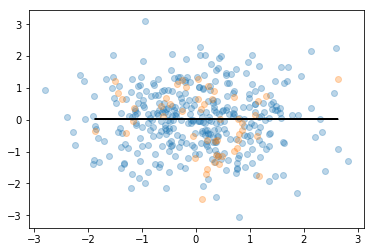

In [11]:
plt.scatter(X_train, y_train, alpha = 0.3)
plt.scatter(x_test, y_test, alpha = 0.3)
plt.plot(x_test, y_predict, color = 'black')

In [12]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [14]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [17]:
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

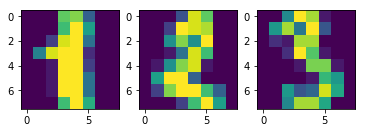

In [19]:
plt.subplot(1, 3, 1)
plt.imshow(digits.images[1])

plt.subplot(1, 3, 2)
plt.imshow(digits.images[2])

plt.subplot(1, 3, 3)
plt.imshow(digits.images[3])


### Learning and Predicting with Digits

Given an image, which digit does it represent?  Here, we will *fit* an estimator to *predict* which class unknown images belong to.  To do this, we will use the support vector classifier.

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC(gamma = 0.001, C = 100)

In [22]:
#fit on all but last data point
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.predict(digits.data[-1:])

array([8])

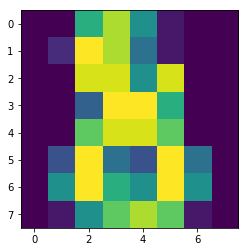

In [24]:
plt.imshow(digits.images[-1])